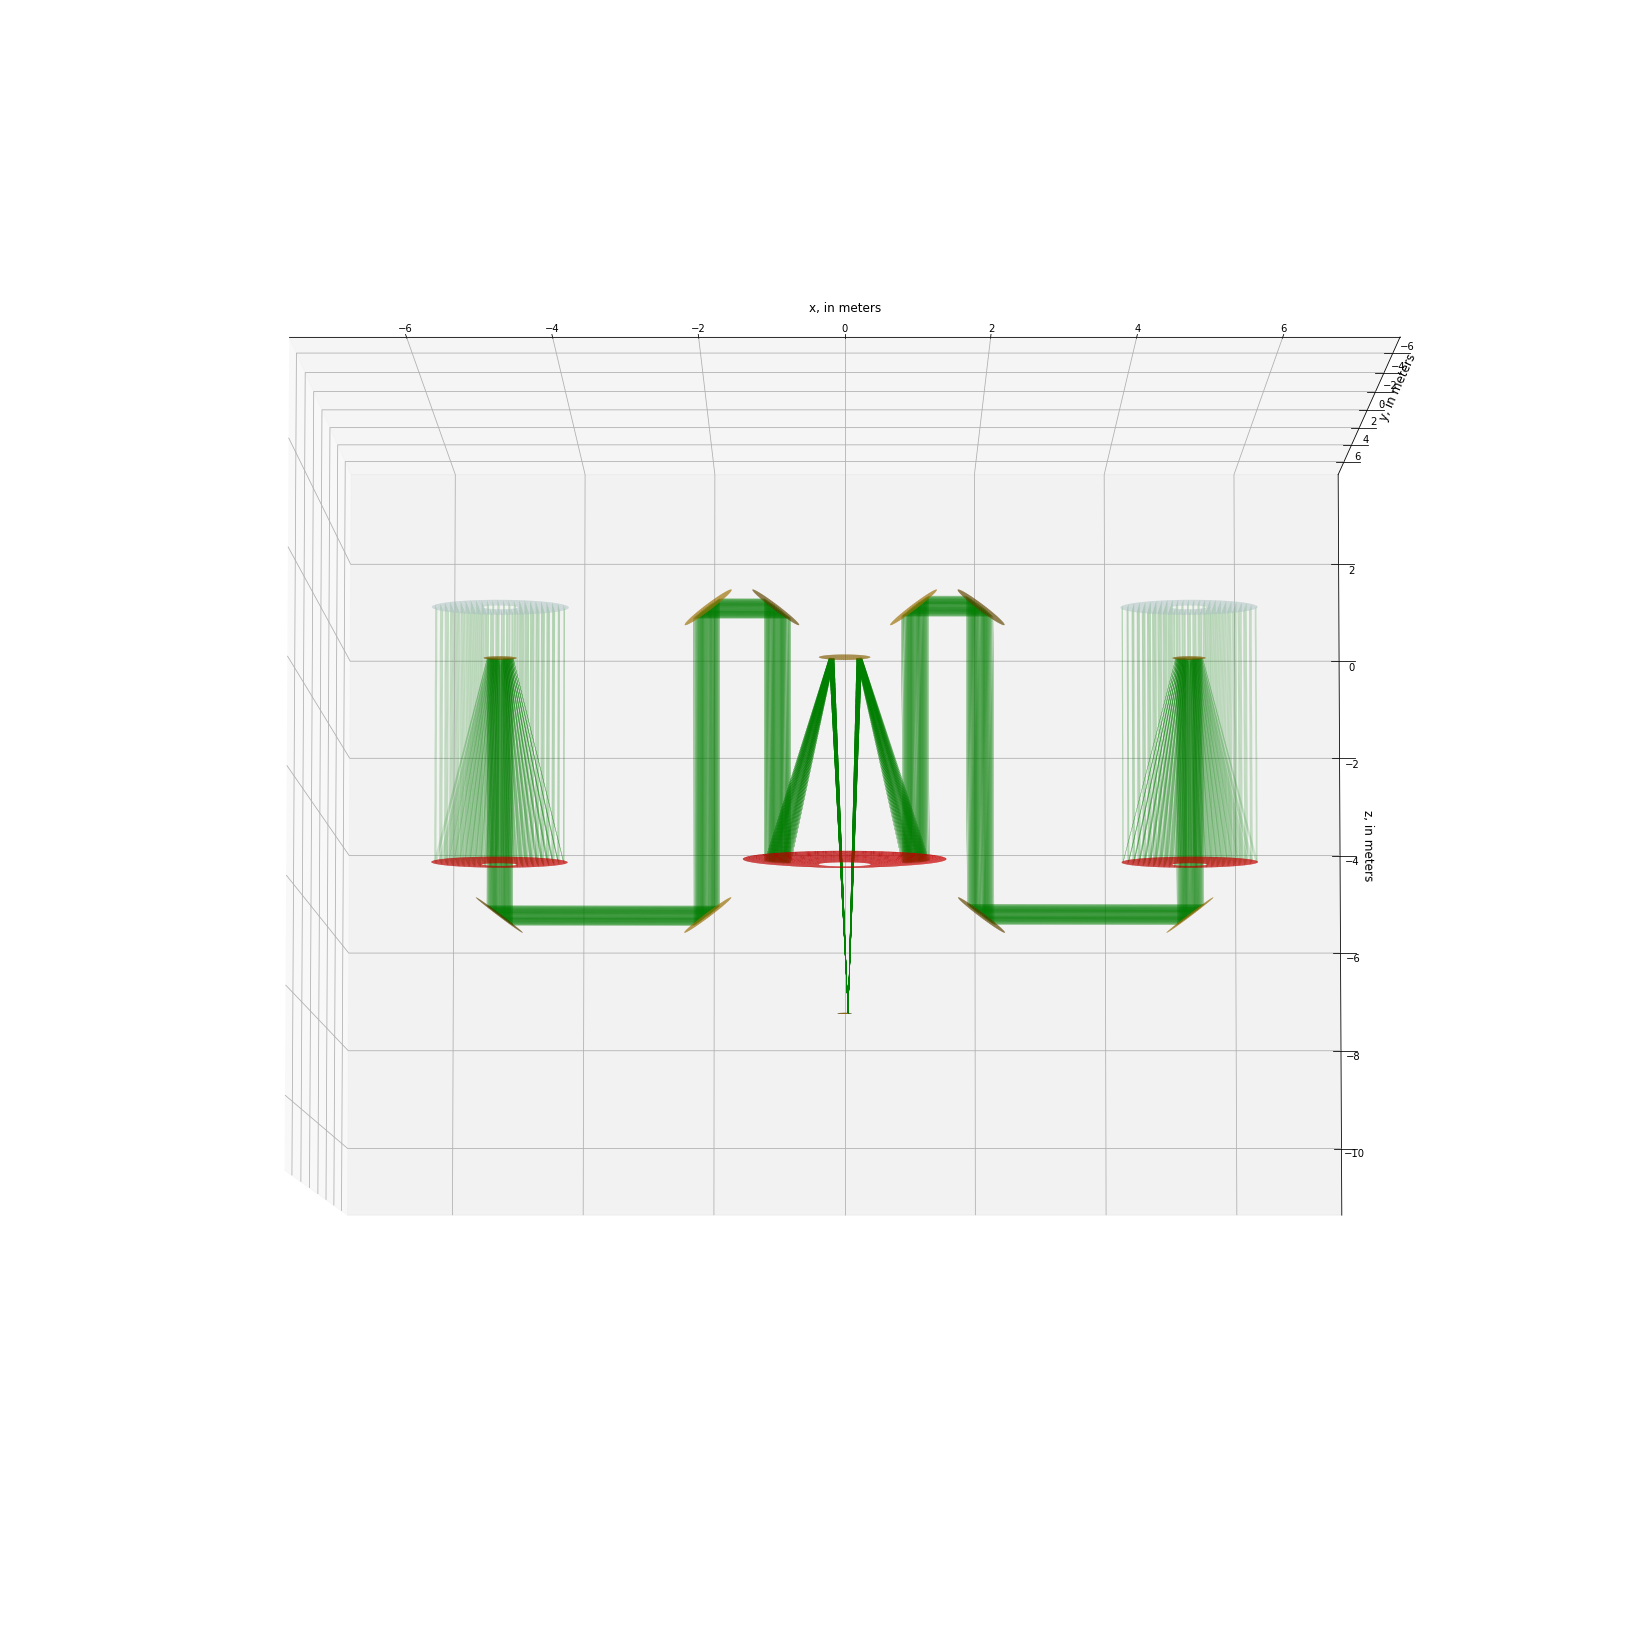

In [782]:
import pimms.optics as op
reload(op)
sim=op.SIM(init_b=10., detector_a=.15)
s=op.LightSource((np.pi,np.deg2rad(1./60.),np.inf))
p,q=s(sim.get_entrance(), 500, 1, sampling='dizzle')
trace,seq=sim.trace(q,steps=10)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
trigs,zs,extent=sim.draw(axes=ax,draw_virtual=True,raytrace=trace,view_angles=(-5, -90))

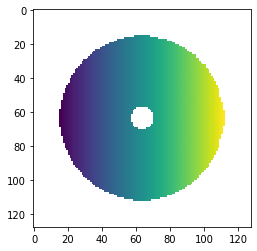

In [541]:
dets=assembly.get_detectors()
dets[0].photon_buffer=np.empty((0,),dtype=op.sptype)
for i in range(4):
    p,q=s(assembly.get_entrance(), 10000, 1., sampling='dizzle')
    trace,seq=assembly.trace(q,steps=6)
plt.imshow(dets[0].readout(clear_buffer=False)[1])

In [606]:
sim.collectors[0].p

array([[-5.],
       [ 0.],
       [ 0.]])

In [607]:
np.isclose(5,2)

False

In [693]:
n,t=sim.collectors[0].parts[1].intersect(p,correction=False)

In [694]:
n=n[:,~np.isinf(t)]

(array([ 7., 32., 57., 83., 94., 71., 62., 55., 32.,  4.]),
 array([-1.19860655e-08, -9.54524451e-09, -7.10442354e-09, -4.66360257e-09,
        -2.22278160e-09,  2.18039364e-10,  2.65886033e-09,  5.09968130e-09,
         7.54050227e-09,  9.98132323e-09,  1.24221442e-08]),
 <BarContainer object of 10 artists>)

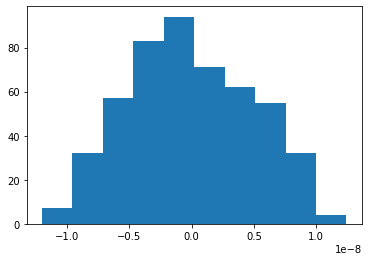

In [695]:
plt.hist(sim.collectors[0].parts[1].height(n[0], n[1])-n[2])

In [667]:
sim.collectors[0].parts[1].normal(np.double([n[0]-5,n[1],n[2]]))

array([[10.64516399, 10.4901975 , 10.33523143, ...,  9.56040675,
         9.40544319,  9.25048005],
       [ 1.86898925,  1.86898925,  1.86898925, ..., -1.85016968,
        -1.85016968, -1.85016968],
       [20.        , 20.        , 20.        , ..., 20.        ,
        20.        , 20.        ]])

In [686]:
n[:,~np.isinf(t)]

array([[-0.29907003, -0.22158684, -0.14410387, ...,         nan,
                nan,         nan],
       [-0.9414717 , -0.9414717 , -0.9414717 , ...,         nan,
                nan,         nan],
       [-4.95120941, -4.95322652, -4.95464326, ...,         nan,
                nan,         nan]])

In [651]:
nn=p[~np.isinf(t)]['position']+t[~np.isinf(t)].reshape((-1,1))*p[~np.isinf(t)]['direction']

In [654]:
nn=nn.transpose()

In [658]:
np.std(nn[2]-n[2])

0.0

(array([  0.,   0.,   0.,   0.,   0., 961.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

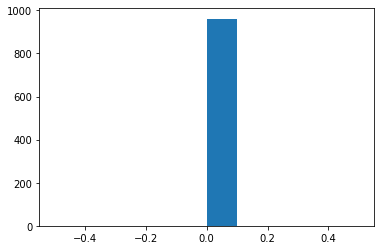

In [783]:
m0=op.SymmetricQuadricMirror(0,10,f=np.inf,g=np.inf)
m1=op.SymmetricQuadricMirror(0,10,f=20,g=np.inf)
p,q=s([m0],1000,1e-3,sampling='dizzle')
r0,t0=m1.intersect(q,min_corrections=4)
plt.hist(r0[2,~np.isinf(t0)]-m1.height(r0[0,~np.isinf(t0)],r0[1,~np.isinf(t0)]))

In [744]:
np.any(np.random.rand(10)<1.)

True